# Predicting Heart Disease 

## About the Data

- The original data came from the Cleveland database from UCI Machine Learning Repository
- This data is downloaded in a formatted way from Kaggle.
- The original database contains 76 attributes, but here only 14 attributes will be used.- Attributes (also called features) are the variables what we'll use to predict our target variable.e.

## Data Dictionary

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
      - can range from mild symptoms to severe problems
      - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
      - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Standard Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Data Loading

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
df["target"].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

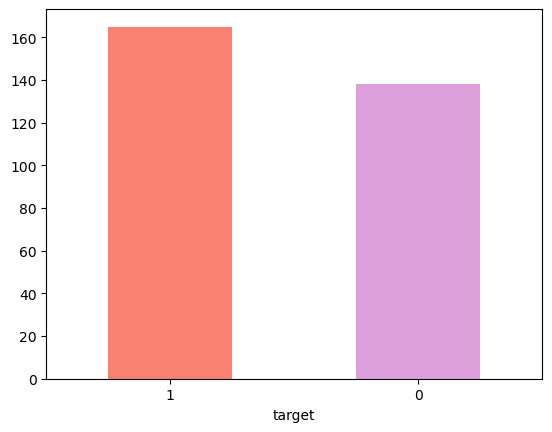

In [10]:
a = df.target.value_counts().plot(kind="bar", color=["salmon", "plum"])
plt.xlabel("target")
plt.xticks(rotation = 0);

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df["sex"].value_counts() 
# 1 = male, 0 = female

1    207
0     96
Name: sex, dtype: int64

There are 207 males and 96 females

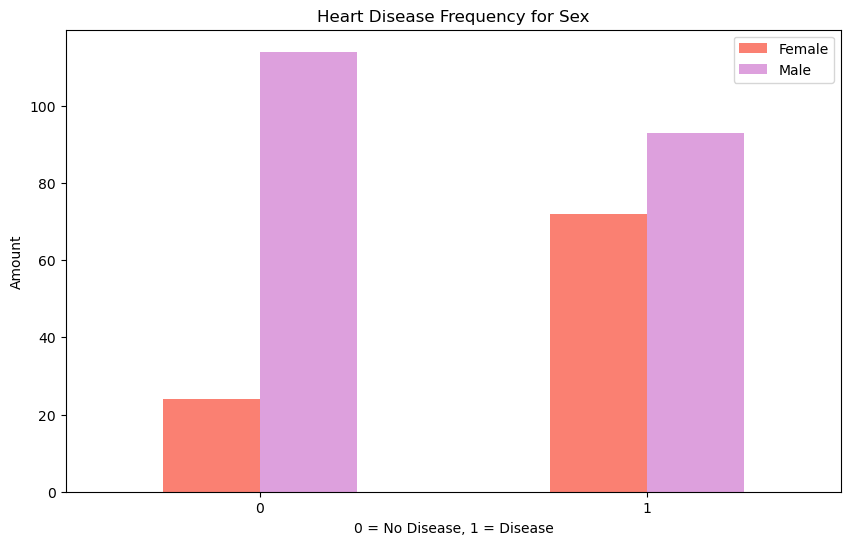

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "plum"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

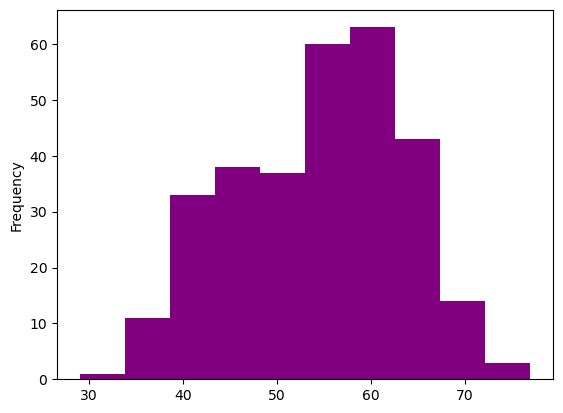

In [14]:
df.age.plot(kind='hist', color="purple");

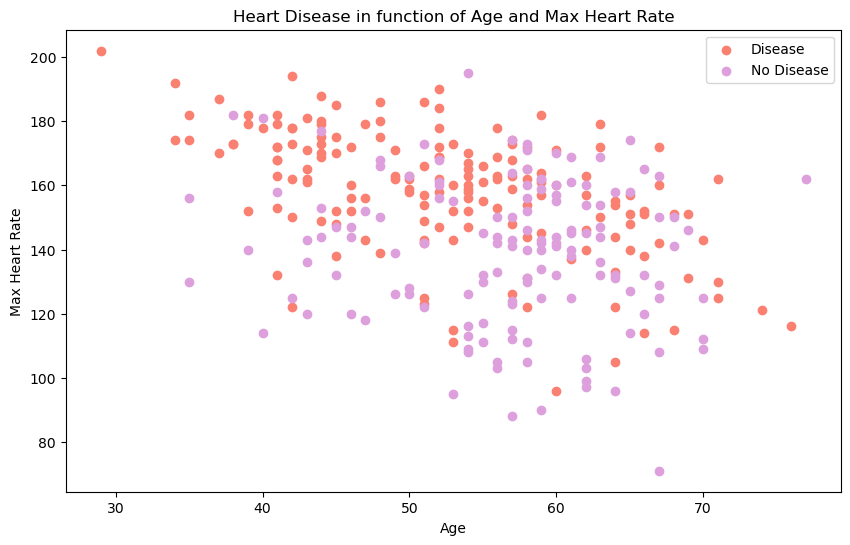

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") 

plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="plum") 

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


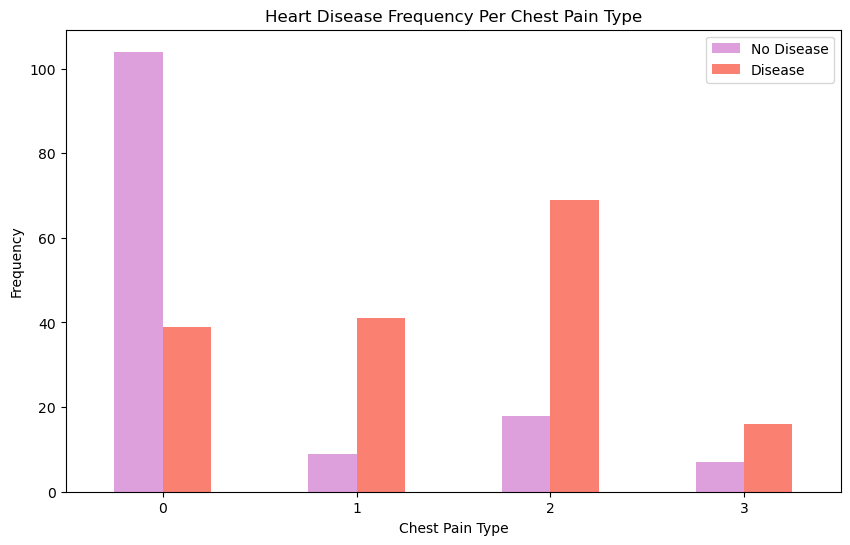

In [17]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6), 
                                   color=["plum", "salmon"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


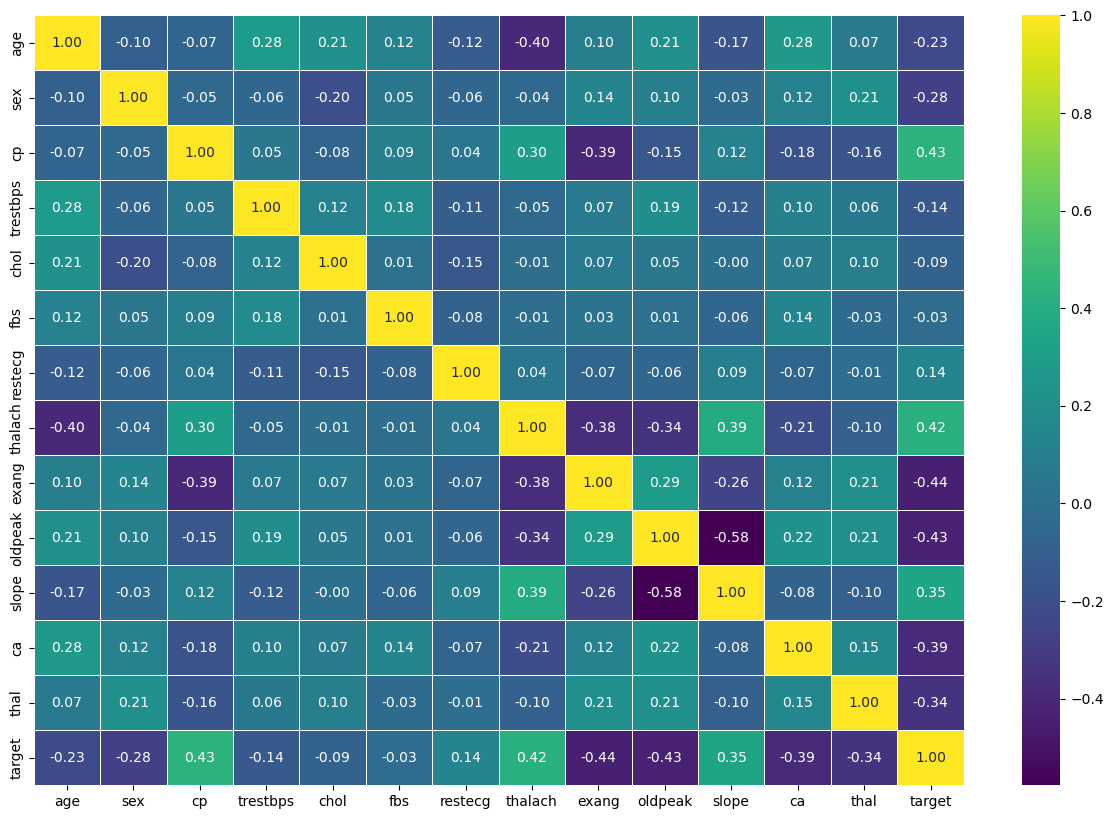

In [19]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f",
            cmap = "viridis");

## Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
X = df.drop("target", axis=1)
y = df["target"].values

In [26]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
X.shape, y.shape

((303, 13), (303,))

Train and Test split:

In [28]:
np.random.seed(42)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [30]:
X_train.shape

(227, 13)

In [31]:
y_train, y_train.shape

(array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 1], dtype=int64),
 (227,))

In [32]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [33]:
X_test.shape

(76, 13)

In [34]:
y_test, y_test.shape

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64),
 (76,))

### Models Used
1.  [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3.  [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4. [`CatBoostClassifier()`](https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier) 


In [49]:
models = {
        "Logistic Regression        ": LogisticRegression(max_iter=1000),
          "KNN                        ": KNeighborsClassifier(),
          "Random Forest              ": RandomForestClassifier(),
          "CatBoost                   ": CatBoostClassifier(),
}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given models.
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [50]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

Learning rate set to 0.00547
0:	learn: 0.6882407	total: 4.08ms	remaining: 4.07s
1:	learn: 0.6840606	total: 7.38ms	remaining: 3.68s
2:	learn: 0.6801035	total: 10.6ms	remaining: 3.52s
3:	learn: 0.6758062	total: 13.9ms	remaining: 3.45s
4:	learn: 0.6717442	total: 15.6ms	remaining: 3.11s
5:	learn: 0.6671794	total: 17.6ms	remaining: 2.92s
6:	learn: 0.6641249	total: 20.4ms	remaining: 2.89s
7:	learn: 0.6603131	total: 22.8ms	remaining: 2.82s
8:	learn: 0.6561870	total: 25.3ms	remaining: 2.78s
9:	learn: 0.6524910	total: 28.4ms	remaining: 2.81s
10:	learn: 0.6480964	total: 30.9ms	remaining: 2.78s
11:	learn: 0.6445001	total: 32.3ms	remaining: 2.66s
12:	learn: 0.6405990	total: 33.5ms	remaining: 2.54s
13:	learn: 0.6369423	total: 34.7ms	remaining: 2.44s
14:	learn: 0.6328240	total: 36ms	remaining: 2.36s
15:	learn: 0.6285960	total: 37.2ms	remaining: 2.29s
16:	learn: 0.6241533	total: 38.4ms	remaining: 2.22s
17:	learn: 0.6199704	total: 39.7ms	remaining: 2.17s
18:	learn: 0.6160648	total: 40.9ms	remaining: 2

{'Logistic Regression        ': 0.8947368421052632,
 'KNN                        ': 0.6973684210526315,
 'Random Forest              ': 0.8157894736842105,
 'CatBoost                   ': 0.8157894736842105}

### Model Comparison

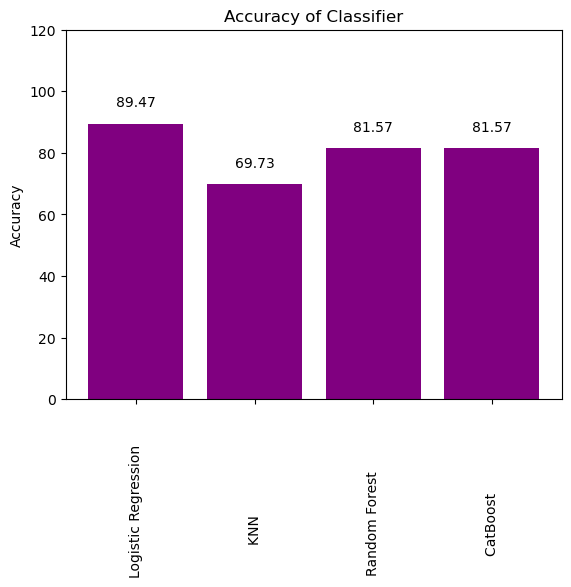

In [38]:
x_axis = model_scores.keys()
y_axis = [89.47, 69.73, 81.57, 81.57]

fig,ax = plt.subplots()

plt.ylabel('Accuracy')
plt.title('Accuracy of Classifier')
plt.xticks(rotation=90)

g=ax.bar(x_axis, y_axis, color="purple")
ax.bar_label(g, padding=10)

_ = ax.set_ylim(0,120) 

From the above graph and `model_scores` dictionary, we can see that [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model performs the best.

## Hyperparameter Tuning 

### 1. Tuning KNeighborsClassifier (KNN) by hand

In [39]:
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [40]:
train_scores

[1.0,
 0.7929515418502202,
 0.7709251101321586,
 0.7444933920704846,
 0.7577092511013216,
 0.73568281938326,
 0.7268722466960352,
 0.7136563876651982,
 0.7224669603524229,
 0.7136563876651982,
 0.7312775330396476,
 0.7136563876651982,
 0.7092511013215859,
 0.6960352422907489,
 0.6960352422907489,
 0.6784140969162996,
 0.6960352422907489,
 0.6607929515418502,
 0.6916299559471366,
 0.6784140969162996]

Maximum KNN score on the test data: 75.00%



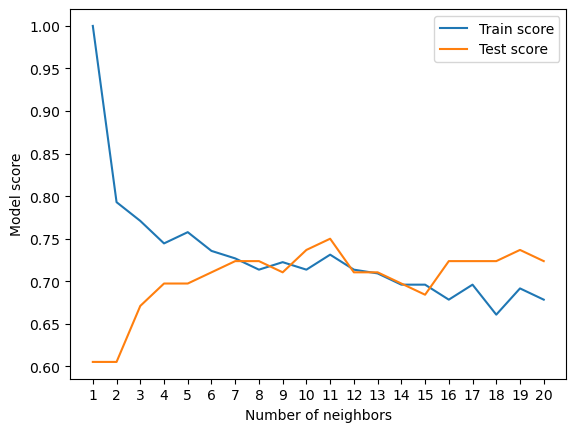

In [41]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")
print("")

In [42]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

### 2. Tuning models with with [`RandomizedSearchCV`]

In [43]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [45]:
rs_log_reg.score(X_test, y_test)

0.8947368421052632

In [46]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [47]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [48]:
rs_rf.score(X_test, y_test)

0.8421052631578947

### 3. Tuning model with [`GridSearchCV`]

In [428]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [429]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [430]:
gs_log_reg.score(X_test, y_test)

0.8947368421052632

**Best model** is `gs_log_reg`

## Evaluation of the model

In [431]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

### 1. ROC Curve & AUC Score

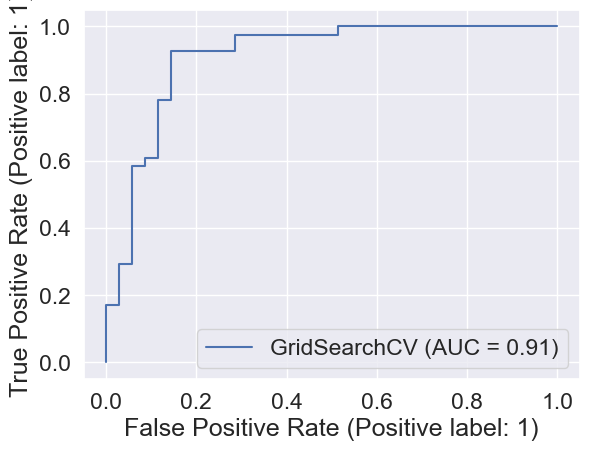

In [441]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test);

### 2. Confusion Matrix

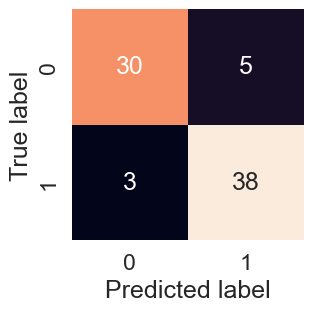

In [433]:
import seaborn as sns
sns.set(font_scale=1.5) 
 
def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("Predicted label") 
    plt.ylabel("True label") 
    
plot_conf_mat(y_test, y_preds)

### 3. Classification Report

In [434]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



## Feature Importance

In [435]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [436]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [437]:
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00569732, -0.80790661,  0.70484859, -0.00987528, -0.00127407,
        -0.00286198,  0.43754721,  0.02157277, -0.63065157, -0.55422567,
         0.47626387, -0.67339791, -0.72810271]])

In [438]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.005697320550784707,
 'sex': -0.8079066149047966,
 'cp': 0.7048485922720281,
 'trestbps': -0.009875277042756453,
 'chol': -0.0012740668142683122,
 'fbs': -0.0028619817988807636,
 'restecg': 0.43754721240901306,
 'thalach': 0.02157276605764497,
 'exang': -0.6306515652460064,
 'oldpeak': -0.5542256725924624,
 'slope': 0.4762638748324066,
 'ca': -0.6733979124968686,
 'thal': -0.7281027121409214}

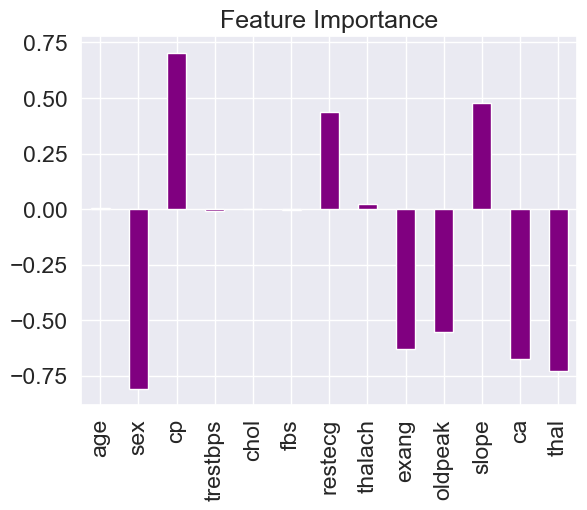

In [439]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False, color="purple");

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

## Saving the model

In [440]:
from joblib import dump, load
dump(gs_log_reg, 'heart-disease-classification-model.joblib')

['heart-disease-classification-model.joblib']